Importando a biblioteca Pandas

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

Importando cada um dos dois conjuntos de dados

In [7]:
mat = pd.read_csv('data_student-mat.csv',sep=';')

por = pd.read_csv('data_student-por.csv',sep=';')

Verificando o número de amostras em cada um dos conjuntos de dados

In [14]:
mat.shape , por.shape

((395, 33), (649, 33))

Teoricamente o merge entre os datasets deveria totalizar 395 + 649 = 1044

Checando as colunas/features de cada dataset individual

In [16]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [17]:
por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [21]:
len(mat.columns)

33

In [22]:
len(por.columns)

33

Checando se ambos os datasets comungam das mesmas colunas/features

In [18]:
mat.columns == por.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [25]:
mat.school.unique()

array(['GP', 'MS'], dtype=object)

In [26]:
por.school.unique()

array(['GP', 'MS'], dtype=object)

Para poder discernir cada disciplina no conjunto de dados pós-mesclagem, uma coluna nova chamada "dis" deverá discriminar entre: matemática como "mat" e portugues como "por"

In [28]:
mat['dis'] = 'mat'

In [29]:
por['dis'] = 'por'

Checando a criação da nova coluna em comum nos datasets

In [31]:
mat.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dis
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat


In [32]:
por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dis
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,por
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,por
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,por


Juntando os dois conjuntos de dados em um único

In [35]:
df = pd.concat([mat,por])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dis
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat


***Checando o merge:*** se o merge foi bem feito então cada conjunto agrupado por disciplina deverá ter o mesmo número de amostras dos conjuntos individuais originais.

In [37]:
df.dis.value_counts()

por    649
mat    395
Name: dis, dtype: int64

***Os números de amostras estão batendo!***

### Merge concluído


### Resolvendo as 4 questões propostas

#### 1 - Os Coodernadores Disciplinares precisam identificar quais alunos tiveram as notas maiores que 10 no primeiro período (G1) em ambas disciplinas e que a mãe seja professora (teacher).

1.1 Filtrando os dados para o grupo de alunos filhos de professorAS através de um dataframe próprio

In [61]:
prof = df.query(' Mjob == "teacher" ')

Agora basta filtrar as notas de 'G1' para valores maiores ou iguais a 10, conforme solicitado pelos coordenadores

In [62]:
result_1 = prof[ prof.G1 >= 10 ]



#### Resposta da questão 1:

In [63]:
result_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dis
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,1,2,2,0,10,8,9,mat
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,3,1,2,3,2,10,10,11,mat
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,1,1,1,1,0,13,14,15,mat
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,5,1,1,3,5,2,15,15,16,mat
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,5,5,5,5,16,10,12,11,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,MS,F,17,R,GT3,T,4,4,teacher,services,...,3,3,1,2,5,2,12,12,12,por
623,MS,M,18,U,LE3,T,4,4,teacher,services,...,2,2,2,2,5,0,15,16,16,por
633,MS,F,18,R,LE3,T,4,4,teacher,services,...,4,3,3,4,2,1,13,14,14,por
636,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,2,4,1,4,2,4,17,18,19,por


#### 2 - Gerar um relatório de alunos que tiveram notas inferiores a 6 nos dois primeiros períodos, G1 e G2 e que tenha a mãe como professora.

Utilizando o mesmo dataframe filtrado para filhos de professorAS, agora basta filtrar pelas notas em cada grupo

In [70]:
result_2 = prof[ (prof.G1 < 6) & (prof.G2 < 6) ]

#### Resposta da questão 2: Há apenas 1 aluno nessas condições

In [71]:
result_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dis
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,3,1,1,1,5,0,5,0,0,por


#### 3 - Listar a porcentagem de alunos que tiveram ajuda extra-curricular segmentado por colégios.


3.1 - Separando apenas alunos que tiveram ajuda extra-curricular e criando um dataset para eles

In [73]:
alunos_extra = df.query( 'schoolsup == "yes" ' )

3.2 - Fazendo a contagem de alunos por escola no dataframe filtrado

In [87]:
alunos_extra.school.value_counts()

GP    107
MS     12
Name: school, dtype: int64

Visualização de alunos com ajuda extra-curricular por escola

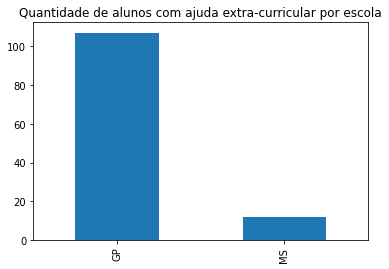

In [111]:
alunos_extra.school.value_counts().plot(kind='bar')
plt.title('Quantidade de alunos com ajuda extra-curricular por escola');

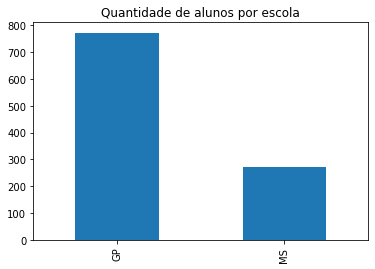

In [113]:
df.school.value_counts().plot(kind='bar')
plt.title('Quantidade de alunos por escola');

3.3 - Fazendo a contagem de alunos da escola GP com ajuda extra-curricular

In [88]:
alunos_extra.school.value_counts()[0]

107

3.4 - Fazendo a contagem do total de alunos da escola GP

In [89]:
df.school.value_counts()[0]

772

3.5 - Estabelecendo a proporção entre alunos com ajuda extra-curricular e o total de alunos da escola GP

In [90]:
alunos_extra.school.value_counts()[0] / df.school.value_counts()[0]

0.13860103626943004

3.6 - Transformando a proporção acima em porcentagem

In [91]:
alunos_extra.school.value_counts()[0] / df.school.value_counts()[0] * 100

13.860103626943005

3.7 - Estabelecendo a porcentagem de alunos com ajuda extra-curricular em relação ao total de alunos da escola MS

In [92]:
alunos_extra.school.value_counts()[1] / df.school.value_counts()[1] * 100

4.411764705882353

#### Resposta da questão 3:

In [103]:
resp_3_1 = alunos_extra.school.value_counts()[0] / df.school.value_counts()[0] * 100

resp_3_2 = alunos_extra.school.value_counts()[1] / df.school.value_counts()[1] * 100

escola1 = alunos_extra.school.value_counts().index[0]

escola2 = alunos_extra.school.value_counts().index[1]

print(f'{round(resp_3_1)}% dos alunos da {escola1} receberam ajuda extra-curricular, enquanto aproximadamente {round(resp_3_2)}% dos alunos da {escola2} receberam ajuda extra-curricular')

14% dos alunos da GP receberam ajuda extra-curricular, enquanto aproximadamente 4% dos alunos da MS receberam ajuda extra-curricular
